# Problema 1.
Para poder tener los modelos primero importaremos nuestras paqueterias.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
import numpy.polynomial.polynomial as poly

Ahora tremos la base de datos de la que tenemos que hacer el análisis.

In [2]:
data = pd.read_csv('problem1.csv')
data.head()

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


Separamos la parte de entrenamiento de la parte de comprobación para el modelo.

In [19]:
train = data.iloc[:,0:2]
train

,X_training,Y_training
0,-2.00,22.067387
1,-1.97,19.944915
2,-1.94,18.062490
3,-1.91,16.384313
4,-1.88,14.567798
...,...,...
129,1.87,4.925350
130,1.90,5.064481
131,1.93,5.154600
132,1.96,5.442464


Usaremos el criterio AIC para escoger el mejor polinomio.

In [20]:
Pol_Max = 15 # Highest degree polynomial we are going to check.
# empty arrays
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

In [23]:
x = train.X_training
y = train.Y_training
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x, y, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y-model(x))**2)
        AICv[i]=len(x)*math.log10(RSSv[i]/len(x))+ 2*len(coef)*len(x)/(len(x)-len(coef)-1)

Graficamos los AIC de los modelos polinomiales paea los datos.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


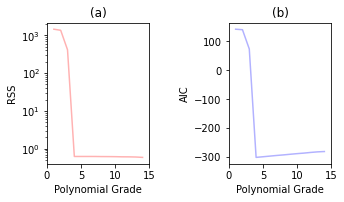

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

Buscamos el grado menor del polinomio que mejor ajusta

In [25]:
grade = np.argmin(AICv)+1
grade

4

Vemos los coeficientes de ese polinomio.

In [26]:
poly.polyfit(x, y, grade)

array([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109])

In [29]:
coef = poly.polyfit(x, y, grade,rcond=None,w=None)

Creamos el modelo

In [30]:
model = poly.Polynomial(coef)
model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

Graficamos todos los datos.

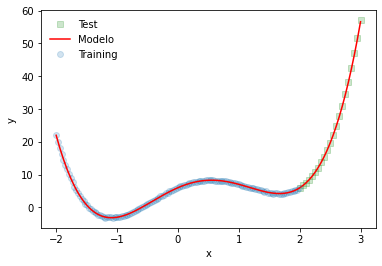

In [38]:
x_test= data.X_test
y_test = data.Y_test
plt.plot(x_test, y_test,'bs', color = 'g',alpha=0.2, label='Test')
plt.plot(x_test, model(x_test),'r', label='Modelo')
plt.plot(x, y,'o',alpha=0.2, label='Training')
plt.plot(x, model(x),'r')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pr el criterio del AIC menor, el polinomio tiene grado 4 y es el que mejor aproxima a los datos y como vemos el el grafico efectivamente predice y se acopla bien al test y a los datos entrenados.

# Problema 3.
Usaremos el modelo logistico para este problema.

In [115]:
data3 = pd.read_csv('problem3.csv')
data3

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0
5,38,280,74,674,0
6,40,235,175,275,1
7,25,200,180,180,1
8,35,150,240,140,1
9,34,280,130,80,1


Ajustaremos el modelo logistico con cada una de las variales explicativas y la respuesta, analizando tanto la matriz de confucion como se ajusta el modelo a predecir la variable respuesta. En cada caso usaremos el 30% de los datos para hacer el test del modelo.

### Modelo Logistico cn la variable edad.

Primero importamos los paquetes.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Definimos nuestro modelo.

In [79]:
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data3[["x_age"]], data3[["y"]], test_size=0.3, random_state=5)

Obtenemos el score del modelo y notamos que ya que obtenemod 0.5, se podria decir que esta variable predice como un volado.

In [86]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\JOSEPH\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5

Obtenemos un graficó de como predice la variable edad.

Text(0, 0.5, 'Age')

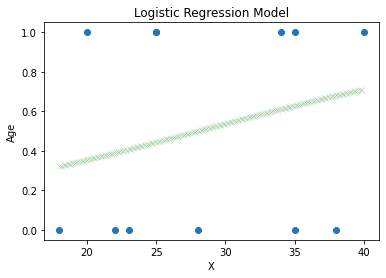

In [87]:
X = np.arange(18, 40, 0.1)
X = X.reshape(-1, 1)
plt.scatter(data3[["x_age"]], data3[["y"]])
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Age')

In [88]:
model.intercept_

array([-2.09950044])

In [89]:
model.coef_

array([[0.07509664]])

Ahora obtenemos la matriz de confusion.

In [91]:
cm = confusion_matrix(data3[["y"]], model.predict(data3[["x_age"]]))

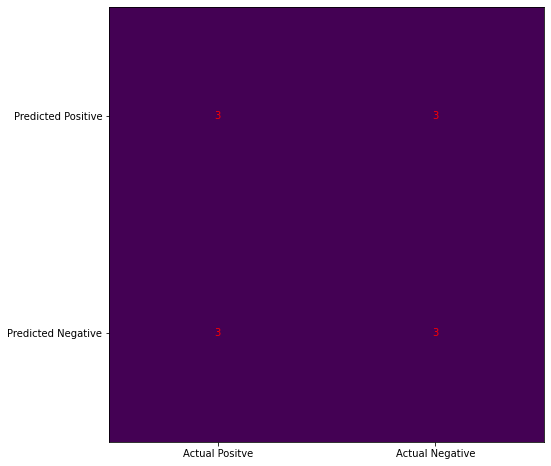

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

La matriz de confusion nos muestra que efectivamente el modelo predice muy mal a la variable respuesta. Ahora, obtenemos el ROC de la variable.

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [94]:
# Genrate a Diagonal(Random Guess)
ns_probs = [0 for _ in range(len(data3[["y"]]))]

In [96]:
# predict probabilities
lr_probs = model.predict_proba(data3[["x_age"]])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(data3[["y"]], ns_probs)
lr_auc = roc_auc_score(data3[["y"]], lr_probs)

In [100]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


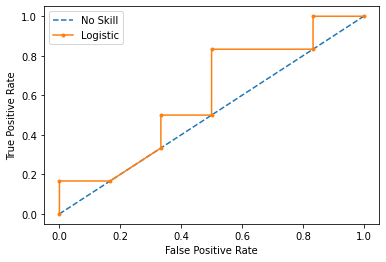

In [99]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(data3[["y"]], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(data3[["y"]], lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Modelo Logistico con la variable colesterol.

In [102]:
x_train, x_test, y_train, y_test = train_test_split(data3[["x_cholesterol"]], data3[["y"]], test_size=0.3, random_state=5)

In [103]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\JOSEPH\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.625

Text(0, 0.5, 'Colesterol')

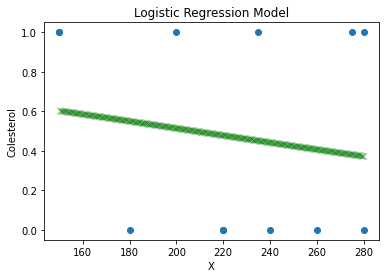

In [105]:
X = np.arange(150, 280, 0.1)
X = X.reshape(-1, 1)
plt.scatter(data3[["x_cholesterol"]], data3[["y"]])
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Colesterol')

In [106]:
model.intercept_

array([1.50771544])

In [108]:
model.coef_

array([[-0.00722093]])

In [109]:
cm = confusion_matrix(data3[["y"]], model.predict(data3[["x_cholesterol"]]))

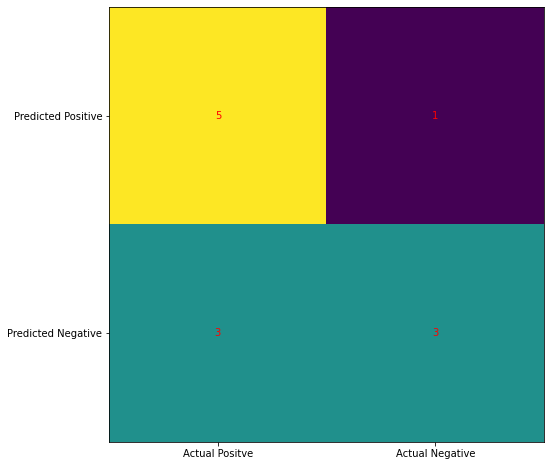

In [110]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Esta variable predice mejor a la variable, aun tenemos que hacer el analisis de 2 variables mas. Ahora, el ROC

In [111]:
# predict probabilities
lr_probs = model.predict_proba(data3[["x_cholesterol"]])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(data3[["y"]], ns_probs)
lr_auc = roc_auc_score(data3[["y"]], lr_probs)

In [113]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.403


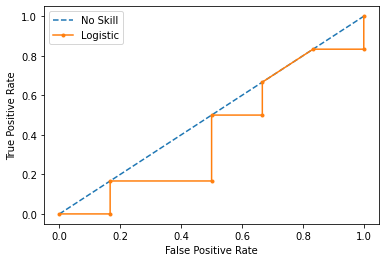

In [114]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(data3[["y"]], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(data3[["y"]], lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Modelo Logistico con la variable azucar.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(data3[["x_sugar"]], data3[["y"]], test_size=0.3, random_state=5)

In [117]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\JOSEPH\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

Text(0, 0.5, 'Azucar')

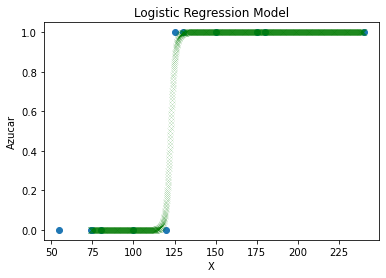

In [122]:
X = np.arange(74, 240, 0.1)
X = X.reshape(-1, 1)
plt.scatter(data3[["x_sugar"]], data3[["y"]])
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Azucar')

In [119]:
model.intercept_

array([-87.67981786])

In [120]:
model.coef_    

array([[0.7157536]])

In [123]:
cm = confusion_matrix(data3[["y"]], model.predict(data3[["x_sugar"]]))

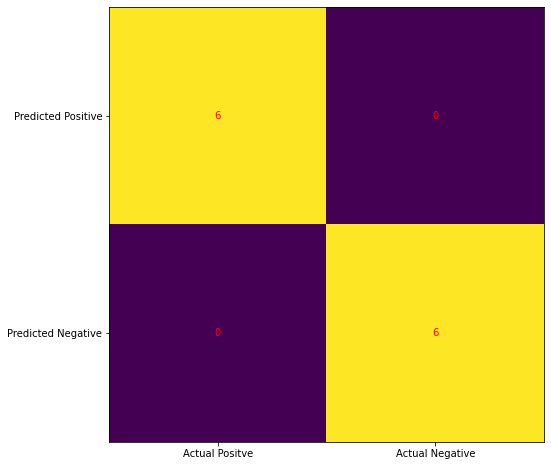

In [124]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [125]:
# predict probabilities
lr_probs = model.predict_proba(data3[["x_sugar"]])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(data3[["y"]], ns_probs)
lr_auc = roc_auc_score(data3[["y"]], lr_probs)

In [126]:
# predict probabilities
lr_probs = model.predict_proba(data3[["x_age"]])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(data3[["y"]], ns_probs)
lr_auc = roc_auc_score(data3[["y"]], lr_probs)

In [127]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.597


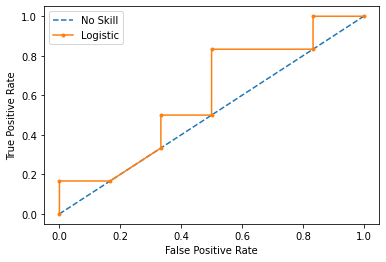

In [128]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(data3[["y"]], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(data3[["y"]], lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Modelo Logistico con la varible Tcell.

In [129]:
x_train, x_test, y_train, y_test = train_test_split(data3[["x_Tcell"]], data3[["y"]], test_size=0.3, random_state=5)

In [130]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\JOSEPH\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

Text(0, 0.5, 'Tcell')

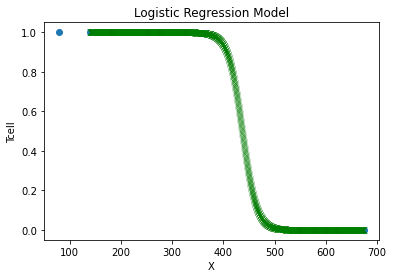

In [131]:
X = np.arange(140, 674, 0.1)
X = X.reshape(-1, 1)
plt.scatter(data3[["x_Tcell"]], data3[["y"]])
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Tcell')

In [132]:
model.intercept_

array([31.70077079])

In [141]:
model.coef_

array([[-0.07262875]])

In [135]:
cm = confusion_matrix(data3[["y"]], model.predict(data3[["x_Tcell"]]))

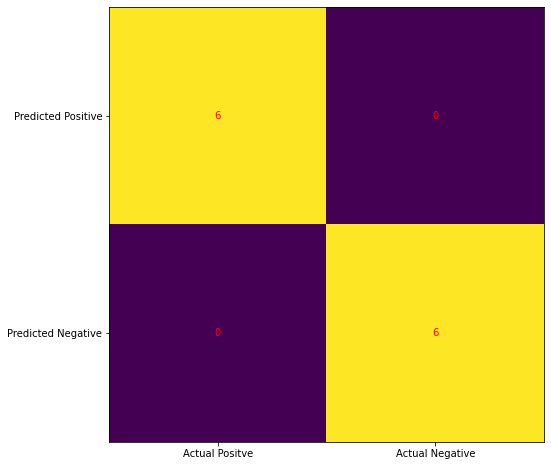

In [136]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [137]:
# predict probabilities
lr_probs = model.predict_proba(data3[["x_Tcell"]])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(data3[["y"]], ns_probs)
lr_auc = roc_auc_score(data3[["y"]], lr_probs)

In [138]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =1.000


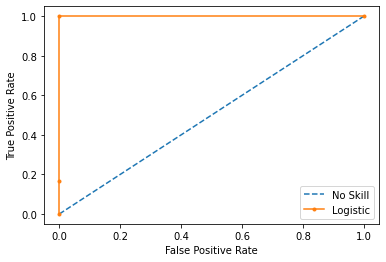

In [139]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(data3[["y"]], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(data3[["y"]], lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

La variable Tcell es la medida que predice mejor la la pretencion a mejorar o no. Ahora el indice podria ser si despues de T-cell es mayor a 475 entonces es posoble que despues de la prueba no se tiene la enfermedad.

# Problema 2.

Para la siguente tabla y con una red neuronal obtendremos la operación pedida.

<table>
<tr><td>

|$x_1$|$x_2$|$x_1\&x_2$|
|--|--|--|
|0|0|1|    
|1|0|1|
|0|1|1|
|1|1|0|    
    
</td><td>

|$x_1$|$x_2$|$x_1\$x_2$| 
|--|--|--|
|0|0|0|    
|1|0|0|
|0|1|0|
|1|1|1|

</td></tr> </table>

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

## Operador &

Esta red unicamente tendra3 entradas y una salida, para hacer una red simple.

In [39]:
# The input and output, i.e. truth table, of a NAND gate
x_train = np.array([[0,0],[0,1],[1,0],[1,1]], "uint8")
y_train = np.array([[1],[1],[1],[0]], "uint8")
 
# Create neural networks model
model = Sequential()
# Add layers to the model
model.add(Dense(3, activation='relu', input_dim=2))      # first hidden layer
#model.add(Dense(3, activation='relu'))                   # second hidden layer
model.add(Dense(1, activation='sigmoid'))                # output layer
 
# Compile the neural networks model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the neural networks model
model.fit(x_train, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 390ms/step - loss: 0.6916 - accuracy: 0.2500
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.6834 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5000
Epoch 11/5000
1/

1/1 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7500
Epoch 84/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.7500
Epoch 85/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7500
Epoch 86/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.5957 - accuracy: 0.7500
Epoch 87/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 1.0000
Epoch 88/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5941 - accuracy: 1.0000
Epoch 89/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5932 - accuracy: 1.0000
Epoch 90/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 1.0000
Epoch 91/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 1.0000
Epoch 92/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5907 - accuracy: 1.0000
Epoch 93/5000
1/1 [===

1/1 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 1.0000
Epoch 165/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.5362 - accuracy: 1.0000
Epoch 166/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 1.0000
Epoch 167/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 1.0000
Epoch 168/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 1.0000
Epoch 169/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 1.0000
Epoch 170/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 1.0000
Epoch 171/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 1.0000
Epoch 172/5000
1/1 [==============================] - 0s 68ms/step - loss: 0.5312 - accuracy: 1.0000
Epoch 173/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 1.0000
Epoch 174/500

Epoch 2621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 1.0000
Epoch 2622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 1.0000
Epoch 2623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 1.0000
Epoch 2624/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 2625/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 2626/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 2627/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 1.0000
Epoch 2628/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 1.0000
Epoch 2629/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 1.0000
Epoch 2630/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0510 - accura

1/1 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 2703/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 2704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 2705/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 2706/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 2707/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 2708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 1.0000
Epoch 2709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 1.0000
Epoch 2710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 1.0000
Epoch 2711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 1.0000
Epoch 2783/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 1.0000
Epoch 2784/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.0467 - accuracy: 1.0000
Epoch 2785/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0467 - accuracy: 1.0000
Epoch 2786/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 2787/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 2788/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 2789/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 2790/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 2791/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 2864/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 1.0000
Epoch 2865/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 1.0000
Epoch 2866/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 1.0000
Epoch 2867/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 1.0000
Epoch 2868/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 2869/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 2870/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 2871/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 2872/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 2945/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 2946/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 2947/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 1.0000
Epoch 2948/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 1.0000
Epoch 2949/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 1.0000
Epoch 2950/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 1.0000
Epoch 2951/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 1.0000
Epoch 2952/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 1.0000
Epoch 2953/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 3025/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 3026/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 3027/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 3028/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 3029/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 3030/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 1.0000
Epoch 3031/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 1.0000
Epoch 3032/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0407 - accuracy: 1.0000
Epoch 3033/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 3106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 3107/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 3108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 3109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 3110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 3111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 3112/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 3113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 3114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 3187/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 3188/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 3189/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 3190/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 3191/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 3192/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 3193/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 3194/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 3195/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 3268/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 3269/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 3270/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 3271/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 3272/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 3273/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 3274/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 3275/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 3276/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 3349/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 3350/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 3351/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 3352/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 3353/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 3354/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 3355/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 3356/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 3357/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 3430/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 3431/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 3432/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 3433/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 3434/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 3435/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 3436/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 3437/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 3438/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3512/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 3517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 1.0000
Epoch 3518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 1.0000
Epoch 3519/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0314 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 3592/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 3593/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 3594/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 3595/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 3596/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 3597/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 3598/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 3599/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 3600/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 3673/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 3674/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 3675/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 3676/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 3677/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 3678/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 3679/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 3680/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 3681/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 3753/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3754/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3755/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3756/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3757/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3758/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3759/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 3760/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 3761/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 3834/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 3835/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 3836/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 3837/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 3838/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 3839/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 3840/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 3841/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 3842/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 3915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3922/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 3996/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 3997/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 3998/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 3999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 4000/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 4001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 4002/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 4003/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 4004/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 4077/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4078/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4079/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4080/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4081/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4082/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4083/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4084/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 4085/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4158/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4159/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4160/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4161/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4162/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4163/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4164/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 4165/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 4166/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4239/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4240/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4241/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4242/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4243/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4244/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4245/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 4246/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 4247/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 4319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 4320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 4321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 4323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 4324/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 4325/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 4326/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 4327/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 4400/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 4401/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 4402/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4404/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 4481/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 4482/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 4483/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 4484/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 4485/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 4486/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 4487/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 4488/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 4489/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4562/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4563/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4564/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4565/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4566/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4567/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4568/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4569/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 4570/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4643/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4644/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4645/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4646/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4647/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4648/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4649/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4650/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 4651/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4724/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4725/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4726/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4727/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4728/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4729/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4730/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4731/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 4732/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4804/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4806/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4807/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4809/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 4811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 4812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 4885/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 4886/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 4887/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 4888/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 4889/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 4890/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 4891/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 4892/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 4893/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 4965/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 4966/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 4967/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 4968/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 4969/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 4970/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 4971/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 4972/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 4973/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch

In [40]:
# Test the output of the trained neural networks based NAND gate
y_predict = model.predict(x_train)
y_predict

array([[0.99981904],
       [0.9456863 ],
       [0.9982928 ],
       [0.00271383]], dtype=float32)

## Operador dolar.

In [41]:
# The input and output, i.e. truth table, of a NAND gate
x_train = np.array([[0,0],[0,1],[1,0],[1,1]], "uint8")
y_train = np.array([[0],[0],[0],[1]], "uint8")
 
# Create neural networks model
modeld = Sequential()
# Add layers to the model
modeld.add(Dense(3, activation='relu', input_dim=2))      # first hidden layer
#modeld.add(Dense(3, activation='relu'))                   # second hidden layer
modeld.add(Dense(1, activation='sigmoid'))                # output layer
 
# Compile the neural networks model
modeld.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the neural networks model
modeld.fit(x_train, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 358ms/step - loss: 0.5930 - accuracy: 1.0000
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 1.0000
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 1.0000
Epoch 4/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5904 - accuracy: 1.0000
Epoch 5/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.5896 - accuracy: 1.0000
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 1.0000
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 1.0000
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 1.0000
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 1.0000
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 1.0000
Epoch 11/5000
1/

1/1 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 1.0000
Epoch 84/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 1.0000
Epoch 85/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 86/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 1.0000
Epoch 87/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5177 - accuracy: 1.0000
Epoch 88/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 1.0000
Epoch 89/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 1.0000
Epoch 90/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.5151 - accuracy: 1.0000
Epoch 91/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 1.0000
Epoch 92/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 1.0000
Epoch 93/5000
1/1 [====

1/1 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 1.0000
Epoch 166/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 1.0000
Epoch 167/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 1.0000
Epoch 168/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 1.0000
Epoch 169/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 1.0000
Epoch 170/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 1.0000
Epoch 171/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 1.0000
Epoch 172/5000
1/1 [==============================] - 0s 61ms/step - loss: 0.4480 - accuracy: 1.0000
Epoch 173/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 1.0000
Epoch 174/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.4464 - accuracy: 1.0000
Epoch 175/500

Epoch 2625/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2626/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2627/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2628/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2629/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2630/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2631/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2633/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 2634/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.0093 - accura

1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2706/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2707/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2709/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2710/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 2712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 2713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 2714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2787/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2788/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2789/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2790/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2791/5000
1/1 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2792/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2793/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2794/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 2795/5000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 2867/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2868/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2869/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2870/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2871/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2872/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2873/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2874/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2875/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2948/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2949/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2950/5000
1/1 [==============================] - 0s 67ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2951/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2952/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2953/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2954/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 2956/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0068 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3029/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3030/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3031/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3032/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3033/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3034/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3035/5000
1/1 [==============================] - 0s 73ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3036/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 3037/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 3109/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 3110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3116/5000
1/1 [==============================] - 0s 64ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 3117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3190/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3191/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3192/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3193/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3194/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3195/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3196/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3197/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 3198/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 18ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 3271/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 3272/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 3273/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3274/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3275/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3276/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3277/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3278/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 3279/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3352/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3353/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3354/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3355/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3356/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3357/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3358/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3359/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3360/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3432/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3433/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3434/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3435/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3436/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3437/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3438/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3439/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 3440/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 3521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3594/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3595/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3596/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3597/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3598/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3599/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3600/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3601/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 3602/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3675/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3676/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3677/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3678/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3679/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3680/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3681/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3682/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 3683/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3756/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3757/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3758/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3759/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3760/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3761/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3762/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3763/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3764/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3836/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3837/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3838/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3839/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3840/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3841/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3842/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3843/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3844/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3924/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 3997/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 3998/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 3999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4000/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4002/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4003/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4004/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 4005/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4078/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4079/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4080/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4081/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4082/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4083/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4084/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4085/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4086/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4159/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4160/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4161/5000
1/1 [==============================] - 0s 71ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4162/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4163/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4164/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4165/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4166/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4167/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4240/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4241/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4242/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4243/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4244/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4245/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4246/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4247/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 4248/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4324/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4325/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4326/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4327/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4328/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4400/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4401/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4402/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4404/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4406/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4407/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4480/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4481/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4482/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4483/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4484/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4485/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4486/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4487/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 4488/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4561/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4562/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4563/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4564/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4565/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4566/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4567/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4568/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4569/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4641/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4642/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4643/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4644/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4645/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4646/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4647/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4648/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4649/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4722/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4723/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4724/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4725/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4726/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4727/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4728/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4729/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4730/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4803/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4804/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4806/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4807/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4808/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4809/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4810/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4811/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4884/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4885/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4886/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4887/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4888/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4889/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4890/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4891/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4892/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4965/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4966/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4967/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4968/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4969/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4970/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4971/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4972/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4973/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch

In [42]:
# Test the output of the trained neural networks based NAND gate
y_predict = modeld.predict(x_train)
y_predict

array([[8.2632899e-04],
       [1.3700426e-03],
       [1.4131367e-03],
       [9.9812031e-01]], dtype=float32)

Ahora hacemos las operaciones pedidas.

In [43]:
A = np.array([1.001,0,0.001,1])
B = np.array([0, 1, 0, 1])
C = np.array([0,1,1,0])
x_test = np.array(np.dstack((A,B)))
AandpersanB = model.predict(x_test)
AandpersanB

array([[[0.99828434],
        [0.9456863 ],
        [0.9998197 ],
        [0.00271383]]], dtype=float32)

In [44]:
x_test = np.dstack((np.array(AandpersanB),C))
AampBdolarC = modeld.predict(x_test)
AampBdolarC

array([[[1.4039576e-03],
        [9.9622655e-01],
        [9.9811602e-01],
        [8.3115697e-04]]], dtype=float32)

# Problema 4

In [26]:
from mpl_toolkits import mplot3d

Obtenemos nuestros datos de entrenamiento.

In [45]:
x = np.random.uniform(-1,1,1000)
y = np.random.uniform(-1,1,1000)
z = np.sqrt(x**2+y**2)

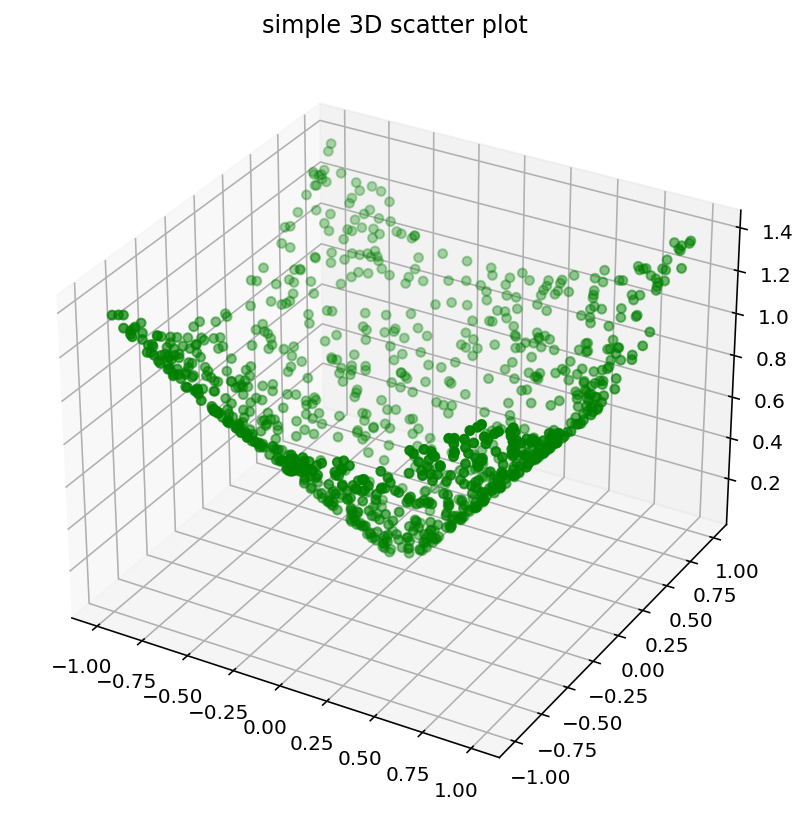

In [46]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

Hagamos el modelo. Que tendra 2 capas una de 3 y otra de 4 celulas.

In [47]:
# The input and output, i.e. truth table, of a NAND gate
x_train = np.array(np.dstack((x,y)))
x_train = np.reshape(x_train, (1000, 2))
# Create neural networks model
modelcono = Sequential()
# Add layers to the model
modelcono.add(Dense(5, activation='relu', input_dim=2))      # first hidden layer
modelcono.add(Dense(3, activation='relu'))                   # second hidden layer
modelcono.add(Dense(4, activation='relu'))
modelcono.add(Dense(1, activation='relu'))                   # output layer
 
# Compile the neural networks model
modelcono.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
# Train the neural networks model
modelcono.fit(x_train, z, epochs=5000)

Epoch 1/5000
32/32 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.0000e+00
Epoch 2/5000
32/32 [==============================] - 0s 978us/step - loss: 0.1231 - accuracy: 0.0000e+00
Epoch 3/5000
32/32 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.0000e+00
Epoch 4/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.0000e+00
Epoch 5/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.0000e+00
Epoch 6/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.0000e+00
Epoch 7/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0775 - accuracy: 0.0000e+00
Epoch 8/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.0000e+00
Epoch 9/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0733 - accuracy: 0.0000e+00
Epoch 10/5000
32/32 [==============================] - 0s 3ms/

32/32 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.0000e+00
Epoch 79/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.0000e+00
Epoch 80/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.0000e+00
Epoch 81/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.0000e+00
Epoch 82/5000
32/32 [==============================] - 0s 955us/step - loss: 0.0497 - accuracy: 0.0000e+00
Epoch 83/5000
32/32 [==============================] - 0s 959us/step - loss: 0.0534 - accuracy: 0.0000e+00
Epoch 84/5000
32/32 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.0000e+00
Epoch 85/5000
32/32 [==============================] - 0s 9ms/step - loss: 0.0492 - accuracy: 0.0000e+00
Epoch 86/5000
32/32 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.0000e+00
Epoch 87/5000
32/32 [==============================] - 0s 3ms/ste

Epoch 3361/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.8643e-04 - accuracy: 0.0000e+00
Epoch 3362/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.8491e-04 - accuracy: 0.0000e+00
Epoch 3363/5000
32/32 [==============================] - 0s 987us/step - loss: 8.1458e-04 - accuracy: 0.0000e+00
Epoch 3364/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.5712e-04 - accuracy: 0.0000e+00
Epoch 3365/5000
32/32 [==============================] - 0s 964us/step - loss: 7.5177e-04 - accuracy: 0.0000e+00
Epoch 3366/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.6895e-04 - accuracy: 0.0000e+00
Epoch 3367/5000
32/32 [==============================] - 0s 1ms/step - loss: 7.1399e-04 - accuracy: 0.0000e+00
Epoch 3368/5000
32/32 [==============================] - 0s 2ms/step - loss: 8.2196e-04 - accuracy: 0.0000e+00
Epoch 3369/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.6792e-04 - accuracy: 0.0000e+

32/32 [==============================] - 0s 2ms/step - loss: 7.9281e-04 - accuracy: 0.0000e+00
Epoch 3435/5000
32/32 [==============================] - 0s 945us/step - loss: 7.2793e-04 - accuracy: 0.0000e+00
Epoch 3436/5000
32/32 [==============================] - 0s 946us/step - loss: 8.2946e-04 - accuracy: 0.0000e+00
Epoch 3437/5000
32/32 [==============================] - 0s 2ms/step - loss: 8.2194e-04 - accuracy: 0.0000e+00
Epoch 3438/5000
32/32 [==============================] - 0s 889us/step - loss: 8.0369e-04 - accuracy: 0.0000e+00
Epoch 3439/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.5599e-04 - accuracy: 0.0000e+00
Epoch 3440/5000
32/32 [==============================] - 0s 945us/step - loss: 8.1867e-04 - accuracy: 0.0000e+00
Epoch 3441/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.4334e-04 - accuracy: 0.0000e+00
Epoch 3442/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.6888e-04 - accuracy: 0.0000e+00
Epoch 344

32/32 [==============================] - 0s 918us/step - loss: 7.0674e-04 - accuracy: 0.0000e+00
Epoch 3508/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0557e-04 - accuracy: 0.0000e+00
Epoch 3509/5000
32/32 [==============================] - 0s 921us/step - loss: 7.3074e-04 - accuracy: 0.0000e+00
Epoch 3510/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.5560e-04 - accuracy: 0.0000e+00
Epoch 3511/5000
32/32 [==============================] - 0s 888us/step - loss: 7.6515e-04 - accuracy: 0.0000e+00
Epoch 3512/5000
32/32 [==============================] - 0s 2ms/step - loss: 8.0336e-04 - accuracy: 0.0000e+00
Epoch 3513/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.7229e-04 - accuracy: 0.0000e+00
Epoch 3514/5000
32/32 [==============================] - 0s 979us/step - loss: 8.0925e-04 - accuracy: 0.0000e+00
Epoch 3515/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0949e-04 - accuracy: 0.0000e+00
Epoch 351

32/32 [==============================] - 0s 3ms/step - loss: 7.3924e-04 - accuracy: 0.0000e+00
Epoch 3581/5000
32/32 [==============================] - 0s 7ms/step - loss: 7.4703e-04 - accuracy: 0.0000e+00
Epoch 3582/5000
32/32 [==============================] - 0s 6ms/step - loss: 7.2620e-04 - accuracy: 0.0000e+00
Epoch 3583/5000
32/32 [==============================] - 0s 3ms/step - loss: 7.2295e-04 - accuracy: 0.0000e+00
Epoch 3584/5000
32/32 [==============================] - 0s 882us/step - loss: 7.4986e-04 - accuracy: 0.0000e+00
Epoch 3585/5000
32/32 [==============================] - 0s 985us/step - loss: 7.6397e-04 - accuracy: 0.0000e+00
Epoch 3586/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.8276e-04 - accuracy: 0.0000e+00
Epoch 3587/5000
32/32 [==============================] - 0s 921us/step - loss: 7.4701e-04 - accuracy: 0.0000e+00
Epoch 3588/5000
32/32 [==============================] - 0s 2ms/step - loss: 8.0927e-04 - accuracy: 0.0000e+00
Epoch 3589/

32/32 [==============================] - 0s 992us/step - loss: 7.2206e-04 - accuracy: 0.0000e+00
Epoch 3654/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.3731e-04 - accuracy: 0.0000e+00
Epoch 3655/5000
32/32 [==============================] - 0s 925us/step - loss: 6.8412e-04 - accuracy: 0.0000e+00
Epoch 3656/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.5907e-04 - accuracy: 0.0000e+00
Epoch 3657/5000
32/32 [==============================] - 0s 971us/step - loss: 7.5099e-04 - accuracy: 0.0000e+00
Epoch 3658/5000
32/32 [==============================] - 0s 919us/step - loss: 7.3754e-04 - accuracy: 0.0000e+00
Epoch 3659/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.5951e-04 - accuracy: 0.0000e+00
Epoch 3660/5000
32/32 [==============================] - 0s 924us/step - loss: 7.5917e-04 - accuracy: 0.0000e+00
Epoch 3661/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0962e-04 - accuracy: 0.0000e+00
Epoch 3

32/32 [==============================] - 0s 2ms/step - loss: 7.4333e-04 - accuracy: 0.0000e+00
Epoch 3727/5000
32/32 [==============================] - 0s 929us/step - loss: 7.6684e-04 - accuracy: 0.0000e+00
Epoch 3728/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.7012e-04 - accuracy: 0.0000e+00
Epoch 3729/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.9061e-04 - accuracy: 0.0000e+00
Epoch 3730/5000
32/32 [==============================] - 0s 933us/step - loss: 7.2034e-04 - accuracy: 0.0000e+00
Epoch 3731/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.7355e-04 - accuracy: 0.0000e+00
Epoch 3732/5000
32/32 [==============================] - 0s 962us/step - loss: 7.4521e-04 - accuracy: 0.0000e+00
Epoch 3733/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.7618e-04 - accuracy: 0.0000e+00
Epoch 3734/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0540e-04 - accuracy: 0.0000e+00
Epoch 3735/

32/32 [==============================] - 0s 1ms/step - loss: 7.1452e-04 - accuracy: 0.0000e+00
Epoch 3800/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.6974e-04 - accuracy: 0.0000e+00
Epoch 3801/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.7535e-04 - accuracy: 0.0000e+00
Epoch 3802/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.9268e-04 - accuracy: 0.0000e+00
Epoch 3803/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.4225e-04 - accuracy: 0.0000e+00
Epoch 3804/5000
32/32 [==============================] - 0s 1ms/step - loss: 7.4504e-04 - accuracy: 0.0000e+00
Epoch 3805/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.6912e-04 - accuracy: 0.0000e+00
Epoch 3806/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.2876e-04 - accuracy: 0.0000e+00
Epoch 3807/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.9979e-04 - accuracy: 0.0000e+00
Epoch 3808/5000
3

32/32 [==============================] - 0s 1ms/step - loss: 7.4025e-04 - accuracy: 0.0000e+00
Epoch 3873/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.6524e-04 - accuracy: 0.0000e+00
Epoch 3874/5000
32/32 [==============================] - 0s 2ms/step - loss: 8.0276e-04 - accuracy: 0.0000e+00
Epoch 3875/5000
32/32 [==============================] - 0s 1ms/step - loss: 7.2324e-04 - accuracy: 0.0000e+00
Epoch 3876/5000
32/32 [==============================] - 0s 1ms/step - loss: 7.2652e-04 - accuracy: 0.0000e+00
Epoch 3877/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0287e-04 - accuracy: 0.0000e+00
Epoch 3878/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.1444e-04 - accuracy: 0.0000e+00
Epoch 3879/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.9357e-04 - accuracy: 0.0000e+00
Epoch 3880/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.4238e-04 - accuracy: 0.0000e+00
Epoch 3881/5000
3

32/32 [==============================] - 0s 1ms/step - loss: 7.0625e-04 - accuracy: 0.0000e+00
Epoch 3946/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0673e-04 - accuracy: 0.0000e+00
Epoch 3947/5000
32/32 [==============================] - 0s 982us/step - loss: 7.2336e-04 - accuracy: 0.0000e+00
Epoch 3948/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.9195e-04 - accuracy: 0.0000e+00
Epoch 3949/5000
32/32 [==============================] - 0s 964us/step - loss: 7.4524e-04 - accuracy: 0.0000e+00
Epoch 3950/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.4641e-04 - accuracy: 0.0000e+00
Epoch 3951/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.3385e-04 - accuracy: 0.0000e+00
Epoch 3952/5000
32/32 [==============================] - 0s 912us/step - loss: 7.6865e-04 - accuracy: 0.0000e+00
Epoch 3953/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.7759e-04 - accuracy: 0.0000e+00
Epoch 3954/

32/32 [==============================] - 0s 2ms/step - loss: 7.1594e-04 - accuracy: 0.0000e+00
Epoch 4019/5000
32/32 [==============================] - 0s 952us/step - loss: 6.7492e-04 - accuracy: 0.0000e+00
Epoch 4020/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.7660e-04 - accuracy: 0.0000e+00
Epoch 4021/5000
32/32 [==============================] - 0s 973us/step - loss: 7.0694e-04 - accuracy: 0.0000e+00
Epoch 4022/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.5443e-04 - accuracy: 0.0000e+00
Epoch 4023/5000
32/32 [==============================] - 0s 1ms/step - loss: 7.3552e-04 - accuracy: 0.0000e+00
Epoch 4024/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.7386e-04 - accuracy: 0.0000e+00
Epoch 4025/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.8442e-04 - accuracy: 0.0000e+00
Epoch 4026/5000
32/32 [==============================] - 0s 1ms/step - loss: 7.2563e-04 - accuracy: 0.0000e+00
Epoch 4027/50

32/32 [==============================] - 0s 923us/step - loss: 6.7549e-04 - accuracy: 0.0000e+00
Epoch 4092/5000
32/32 [==============================] - 0s 986us/step - loss: 7.3356e-04 - accuracy: 0.0000e+00
Epoch 4093/5000
32/32 [==============================] - 0s 3ms/step - loss: 6.7402e-04 - accuracy: 0.0000e+00
Epoch 4094/5000
32/32 [==============================] - 0s 933us/step - loss: 7.0681e-04 - accuracy: 0.0000e+00
Epoch 4095/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.4970e-04 - accuracy: 0.0000e+00
Epoch 4096/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.6326e-04 - accuracy: 0.0000e+00
Epoch 4097/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.6419e-04 - accuracy: 0.0000e+00
Epoch 4098/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8659e-04 - accuracy: 0.0000e+00
Epoch 4099/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.4641e-04 - accuracy: 0.0000e+00
Epoch 4100/

32/32 [==============================] - 0s 915us/step - loss: 6.7654e-04 - accuracy: 0.0000e+00
Epoch 4165/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.5520e-04 - accuracy: 0.0000e+00
Epoch 4166/5000
32/32 [==============================] - 0s 885us/step - loss: 6.8112e-04 - accuracy: 0.0000e+00
Epoch 4167/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.6955e-04 - accuracy: 0.0000e+00
Epoch 4168/5000
32/32 [==============================] - 0s 894us/step - loss: 6.8635e-04 - accuracy: 0.0000e+00
Epoch 4169/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0653e-04 - accuracy: 0.0000e+00
Epoch 4170/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.3638e-04 - accuracy: 0.0000e+00
Epoch 4171/5000
32/32 [==============================] - 0s 954us/step - loss: 7.7027e-04 - accuracy: 0.0000e+00
Epoch 4172/5000
32/32 [==============================] - 0s 2ms/step - loss: 7.0974e-04 - accuracy: 0.0000e+00
Epoch 417

32/32 [==============================] - 0s 958us/step - loss: 6.5623e-04 - accuracy: 0.0000e+00
Epoch 4238/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.7712e-04 - accuracy: 0.0000e+00
Epoch 4239/5000
32/32 [==============================] - 0s 972us/step - loss: 7.0701e-04 - accuracy: 0.0000e+00
Epoch 4240/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.1620e-04 - accuracy: 0.0000e+00
Epoch 4241/5000
32/32 [==============================] - 0s 863us/step - loss: 6.7217e-04 - accuracy: 0.0000e+00
Epoch 4242/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.9102e-04 - accuracy: 0.0000e+00
Epoch 4243/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8025e-04 - accuracy: 0.0000e+00
Epoch 4244/5000
32/32 [==============================] - 0s 960us/step - loss: 6.0978e-04 - accuracy: 0.0000e+00
Epoch 4245/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.7916e-04 - accuracy: 0.0000e+00
Epoch 424

32/32 [==============================] - 0s 2ms/step - loss: 6.8019e-04 - accuracy: 0.0000e+00
Epoch 4311/5000
32/32 [==============================] - 0s 928us/step - loss: 7.1729e-04 - accuracy: 0.0000e+00
Epoch 4312/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.2465e-04 - accuracy: 0.0000e+00
Epoch 4313/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.8905e-04 - accuracy: 0.0000e+00
Epoch 4314/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.3706e-04 - accuracy: 0.0000e+00
Epoch 4315/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8015e-04 - accuracy: 0.0000e+00
Epoch 4316/5000
32/32 [==============================] - 0s 907us/step - loss: 7.0059e-04 - accuracy: 0.0000e+00
Epoch 4317/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.7688e-04 - accuracy: 0.0000e+00
Epoch 4318/5000
32/32 [==============================] - 0s 921us/step - loss: 6.5495e-04 - accuracy: 0.0000e+00
Epoch 4319/

32/32 [==============================] - 0s 2ms/step - loss: 7.1433e-04 - accuracy: 0.0000e+00
Epoch 4384/5000
32/32 [==============================] - 0s 954us/step - loss: 7.0583e-04 - accuracy: 0.0000e+00
Epoch 4385/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.5869e-04 - accuracy: 0.0000e+00
Epoch 4386/5000
32/32 [==============================] - 0s 3ms/step - loss: 6.4664e-04 - accuracy: 0.0000e+00
Epoch 4387/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.3001e-04 - accuracy: 0.0000e+00
Epoch 4388/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8387e-04 - accuracy: 0.0000e+00
Epoch 4389/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.6558e-04 - accuracy: 0.0000e+00
Epoch 4390/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.4230e-04 - accuracy: 0.0000e+00
Epoch 4391/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.2689e-04 - accuracy: 0.0000e+00
Epoch 4392/5000

32/32 [==============================] - 0s 938us/step - loss: 6.1294e-04 - accuracy: 0.0000e+00
Epoch 4457/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.5918e-04 - accuracy: 0.0000e+00
Epoch 4458/5000
32/32 [==============================] - 0s 925us/step - loss: 6.4670e-04 - accuracy: 0.0000e+00
Epoch 4459/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.6507e-04 - accuracy: 0.0000e+00
Epoch 4460/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8449e-04 - accuracy: 0.0000e+00
Epoch 4461/5000
32/32 [==============================] - 0s 900us/step - loss: 6.1459e-04 - accuracy: 0.0000e+00
Epoch 4462/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.6279e-04 - accuracy: 0.0000e+00
Epoch 4463/5000
32/32 [==============================] - 0s 905us/step - loss: 6.3696e-04 - accuracy: 0.0000e+00
Epoch 4464/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.0605e-04 - accuracy: 0.0000e+00
Epoch 446

32/32 [==============================] - 0s 938us/step - loss: 6.2530e-04 - accuracy: 0.0000e+00
Epoch 4530/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.1435e-04 - accuracy: 0.0000e+00
Epoch 4531/5000
32/32 [==============================] - 0s 907us/step - loss: 5.9699e-04 - accuracy: 0.0000e+00
Epoch 4532/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.6208e-04 - accuracy: 0.0000e+00
Epoch 4533/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.6836e-04 - accuracy: 0.0000e+00
Epoch 4534/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.1308e-04 - accuracy: 0.0000e+00
Epoch 4535/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.4336e-04 - accuracy: 0.0000e+00
Epoch 4536/5000
32/32 [==============================] - 0s 1ms/step - loss: 5.9418e-04 - accuracy: 0.0000e+00
Epoch 4537/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8096e-04 - accuracy: 0.0000e+00
Epoch 4538/50

32/32 [==============================] - 0s 2ms/step - loss: 5.9936e-04 - accuracy: 0.0000e+00
Epoch 4603/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.1371e-04 - accuracy: 0.0000e+00
Epoch 4604/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.2819e-04 - accuracy: 0.0000e+00
Epoch 4605/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.9089e-04 - accuracy: 0.0000e+00
Epoch 4606/5000
32/32 [==============================] - 0s 892us/step - loss: 6.1737e-04 - accuracy: 0.0000e+00
Epoch 4607/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.2527e-04 - accuracy: 0.0000e+00
Epoch 4608/5000
32/32 [==============================] - 0s 938us/step - loss: 6.3599e-04 - accuracy: 0.0000e+00
Epoch 4609/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.3704e-04 - accuracy: 0.0000e+00
Epoch 4610/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.8231e-04 - accuracy: 0.0000e+00
Epoch 4611/50

32/32 [==============================] - 0s 2ms/step - loss: 6.5487e-04 - accuracy: 0.0000e+00
Epoch 4676/5000
32/32 [==============================] - 0s 953us/step - loss: 6.2246e-04 - accuracy: 0.0000e+00
Epoch 4677/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.8123e-04 - accuracy: 0.0000e+00
Epoch 4678/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.4446e-04 - accuracy: 0.0000e+00
Epoch 4679/5000
32/32 [==============================] - 0s 890us/step - loss: 6.4100e-04 - accuracy: 0.0000e+00
Epoch 4680/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.6447e-04 - accuracy: 0.0000e+00
Epoch 4681/5000
32/32 [==============================] - 0s 875us/step - loss: 6.4297e-04 - accuracy: 0.0000e+00
Epoch 4682/5000
32/32 [==============================] - 0s 3ms/step - loss: 6.4216e-04 - accuracy: 0.0000e+00
Epoch 4683/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.2671e-04 - accuracy: 0.0000e+00
Epoch 4684/

32/32 [==============================] - 0s 2ms/step - loss: 6.6862e-04 - accuracy: 0.0000e+00
Epoch 4749/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.4142e-04 - accuracy: 0.0000e+00
Epoch 4750/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.0987e-04 - accuracy: 0.0000e+00
Epoch 4751/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.4369e-04 - accuracy: 0.0000e+00
Epoch 4752/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.3362e-04 - accuracy: 0.0000e+00
Epoch 4753/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.3705e-04 - accuracy: 0.0000e+00
Epoch 4754/5000
32/32 [==============================] - 0s 945us/step - loss: 6.2698e-04 - accuracy: 0.0000e+00
Epoch 4755/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.5488e-04 - accuracy: 0.0000e+00
Epoch 4756/5000
32/32 [==============================] - 0s 1ms/step - loss: 5.9817e-04 - accuracy: 0.0000e+00
Epoch 4757/5000

32/32 [==============================] - 0s 959us/step - loss: 5.1690e-04 - accuracy: 0.0000e+00
Epoch 4822/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.8467e-04 - accuracy: 0.0000e+00
Epoch 4823/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.8547e-04 - accuracy: 0.0000e+00
Epoch 4824/5000
32/32 [==============================] - 0s 967us/step - loss: 6.8947e-04 - accuracy: 0.0000e+00
Epoch 4825/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.9197e-04 - accuracy: 0.0000e+00
Epoch 4826/5000
32/32 [==============================] - 0s 867us/step - loss: 6.2232e-04 - accuracy: 0.0000e+00
Epoch 4827/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.0631e-04 - accuracy: 0.0000e+00
Epoch 4828/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.6664e-04 - accuracy: 0.0000e+00
Epoch 4829/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.1615e-04 - accuracy: 0.0000e+00
Epoch 4830/

32/32 [==============================] - 0s 2ms/step - loss: 5.9514e-04 - accuracy: 0.0000e+00
Epoch 4895/5000
32/32 [==============================] - 0s 992us/step - loss: 6.2259e-04 - accuracy: 0.0000e+00
Epoch 4896/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.5985e-04 - accuracy: 0.0000e+00
Epoch 4897/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.7806e-04 - accuracy: 0.0000e+00
Epoch 4898/5000
32/32 [==============================] - 0s 1ms/step - loss: 5.6224e-04 - accuracy: 0.0000e+00
Epoch 4899/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.9445e-04 - accuracy: 0.0000e+00
Epoch 4900/5000
32/32 [==============================] - 0s 932us/step - loss: 6.1369e-04 - accuracy: 0.0000e+00
Epoch 4901/5000
32/32 [==============================] - 0s 1ms/step - loss: 6.2444e-04 - accuracy: 0.0000e+00
Epoch 4902/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.0423e-04 - accuracy: 0.0000e+00
Epoch 4903/50

32/32 [==============================] - 0s 3ms/step - loss: 6.1633e-04 - accuracy: 0.0000e+00
Epoch 4968/5000
32/32 [==============================] - 0s 920us/step - loss: 6.2131e-04 - accuracy: 0.0000e+00
Epoch 4969/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.0220e-04 - accuracy: 0.0000e+00
Epoch 4970/5000
32/32 [==============================] - 0s 931us/step - loss: 6.1486e-04 - accuracy: 0.0000e+00
Epoch 4971/5000
32/32 [==============================] - 0s 925us/step - loss: 5.9053e-04 - accuracy: 0.0000e+00
Epoch 4972/5000
32/32 [==============================] - 0s 2ms/step - loss: 6.1693e-04 - accuracy: 0.0000e+00
Epoch 4973/5000
32/32 [==============================] - 0s 944us/step - loss: 5.9817e-04 - accuracy: 0.0000e+00
Epoch 4974/5000
32/32 [==============================] - 0s 2ms/step - loss: 5.8241e-04 - accuracy: 0.0000e+00
Epoch 4975/5000
32/32 [==============================] - 0s 879us/step - loss: 6.0670e-04 - accuracy: 0.0000e+00
Epoch 4

Ahora hay que hacer el test para el modelo obtenido con la red neuronal.

In [48]:
xt = np.random.uniform(-1,1,500)
yt = np.random.uniform(-1,1,500)
x_test = np.array(np.dstack((xt,yt)))
x_test = np.reshape(x_test, (500, 2))
zt = modelcono.predict(x_test)

Verficamos con una grafica.

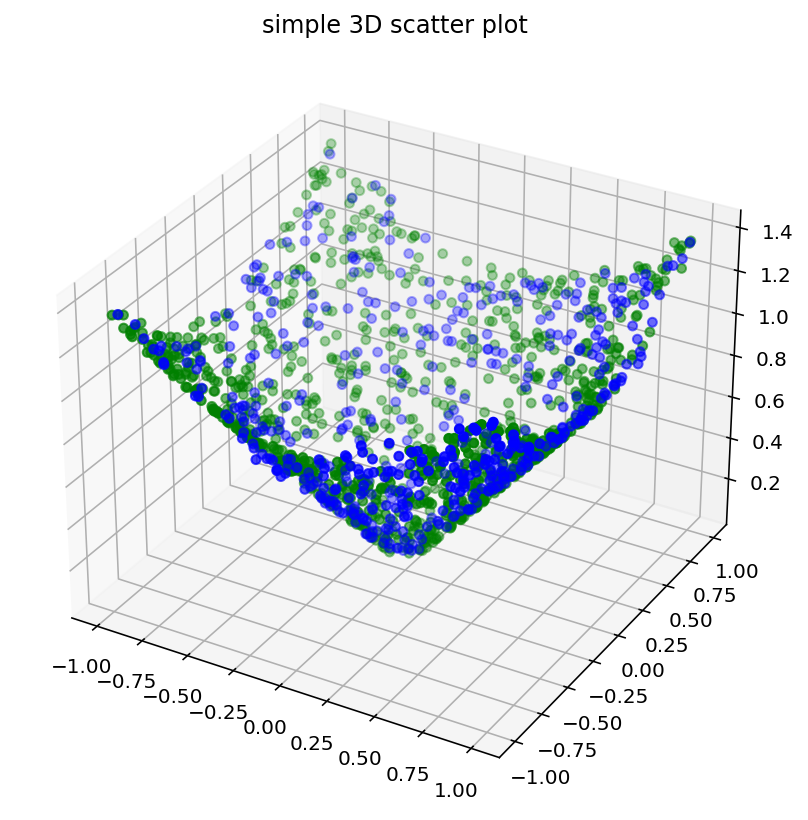

In [49]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.scatter3D(xt, yt, zt, color = "blue")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

La grafica nos muestra que nuestra red neuronal hace un buen entrenamiento para el modelo del cono.